### Jupyter notebook about retail stocks performance in Brazilian market!

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Ativos do varejo do mercado brasileiro

In [2]:
## main bank stocks ##
ativos = ['BBAS3','ITUB4','BPAC11','SANB11','BBDC4']

In [3]:
ativos = [i + '.SA' for i in ativos]

In [4]:
inicio = '2020-02-01'
#fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest= yesterday.strftime('%Y-%m-%d')
yest

'2024-06-04'

In [5]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [6]:
df.tail()

,BBAS3.SA,BBDC3.SA,BPAC11.SA,ITUB4.SA,SANB11.SA
Date,,,,,
2024-05-27,27.410000,11.632479,32.230000,31.721947,27.629999
2024-05-28,27.320000,11.602524,32.240002,31.552042,27.940001
2024-05-29,27.320000,11.482704,31.930000,31.332169,27.709999
2024-05-31,27.120001,11.432779,31.590000,31.012350,27.750000
2024-06-03,27.150000,11.452750,32.560001,31.450001,27.860001


#### normalizando os ativos


In [7]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

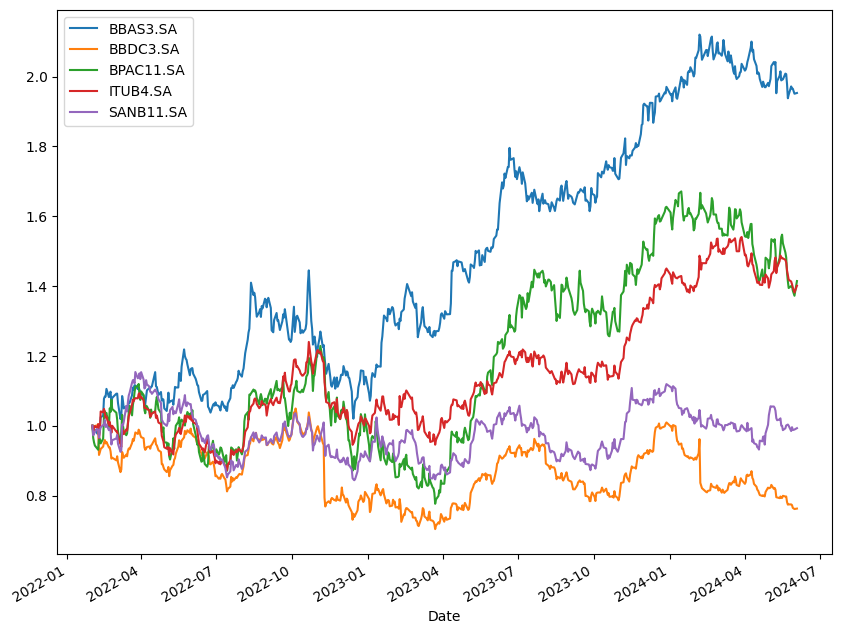

In [8]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [9]:
primeiro = df.iloc[0]

In [10]:
primeiro

BBAS3.SA     13.902455
BBDC3.SA     15.017198
BPAC11.SA    23.022951
ITUB4.SA     22.450006
SANB11.SA    28.058332
Name: 2022-02-01 00:00:00, dtype: float64

In [11]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [12]:
comprados = 10000/primeiro

In [13]:
comprados

BBAS3.SA     719.297402
BBDC3.SA     665.903204
BPAC11.SA    434.349182
ITUB4.SA     445.434170
SANB11.SA    356.400368
Name: 2022-02-01 00:00:00, dtype: float64

In [14]:
# Número de papéis arredondados
round(comprados, 0)

BBAS3.SA     719.0
BBDC3.SA     666.0
BPAC11.SA    434.0
ITUB4.SA     445.0
SANB11.SA    356.0
Name: 2022-02-01 00:00:00, dtype: float64

In [15]:
comprados = round(comprados, 0)

In [16]:
comprados

BBAS3.SA     719.0
BBDC3.SA     666.0
BPAC11.SA    434.0
ITUB4.SA     445.0
SANB11.SA    356.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [17]:
PL = df*comprados
#PL=df*qntd

In [18]:
PL.head()

,BBAS3.SA,BBDC3.SA,BPAC11.SA,ITUB4.SA,SANB11.SA
Date,,,,,
2022-02-01,9995.865382,10001.453608,9991.960789,9990.252886,9988.766350
2022-02-02,9830.340059,9834.923120,9637.605709,9833.482494,9711.640182
2022-02-03,9897.777165,9973.362322,9509.872852,9947.140455,9757.320312
2022-02-04,9879.384853,9994.666426,9423.345692,9978.491478,9818.228737
2022-02-07,9765.969367,10010.637199,9336.816048,9923.623581,9894.361382


In [19]:
PL.tail()

,BBAS3.SA,BBDC3.SA,BPAC11.SA,ITUB4.SA,SANB11.SA
Date,,,,,
2024-05-27,19707.789890,7747.230824,13987.819801,14116.266289,9836.279701
2024-05-28,19643.079781,7727.280853,13992.160728,14040.658693,9946.640190
2024-05-29,19643.079781,7647.480972,13857.620132,13942.815018,9864.759674
2024-05-31,19499.280603,7614.231022,13710.060066,13800.495787,9879.000000
2024-06-03,19520.849726,7627.531637,14131.040596,13995.250340,9918.160217


In [20]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [21]:
#PL.head()
PL.tail()

,BBAS3.SA,BBDC3.SA,BPAC11.SA,ITUB4.SA,SANB11.SA,PL Total
Date,,,,,,
2024-05-27,19707.789890,7747.230824,13987.819801,14116.266289,9836.279701,65395.386505
2024-05-28,19643.079781,7727.280853,13992.160728,14040.658693,9946.640190,65349.820246
2024-05-29,19643.079781,7647.480972,13857.620132,13942.815018,9864.759674,64955.755577
2024-05-31,19499.280603,7614.231022,13710.060066,13800.495787,9879.000000,64503.067478
2024-06-03,19520.849726,7627.531637,14131.040596,13995.250340,9918.160217,65192.832516


In [22]:
ibov = yf.download('^BVSP', start = inicio, end = yest)

[*********************100%***********************]  1 of 1 completed


In [23]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [24]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [25]:
ibov = ibov[['Ibov']]

In [26]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2024-05-27,124496.0
2024-05-28,123780.0
2024-05-29,122707.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [27]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [28]:
novo_df.head()

,Ibov,BBAS3.SA,BBDC3.SA,BPAC11.SA,ITUB4.SA,SANB11.SA,PL Total
Date,,,,,,,
2022-02-01,113147.0,9995.865382,10001.453608,9991.960789,9990.252886,9988.766350,49968.299014
2022-02-02,112161.0,9830.340059,9834.923120,9637.605709,9833.482494,9711.640182,48847.991566
2022-02-03,111696.0,9897.777165,9973.362322,9509.872852,9947.140455,9757.320312,49085.473107
2022-02-04,112245.0,9879.384853,9994.666426,9423.345692,9978.491478,9818.228737,49094.117186
2022-02-07,111996.0,9765.969367,10010.637199,9336.816048,9923.623581,9894.361382,48931.407577


<Axes: xlabel='Date'>

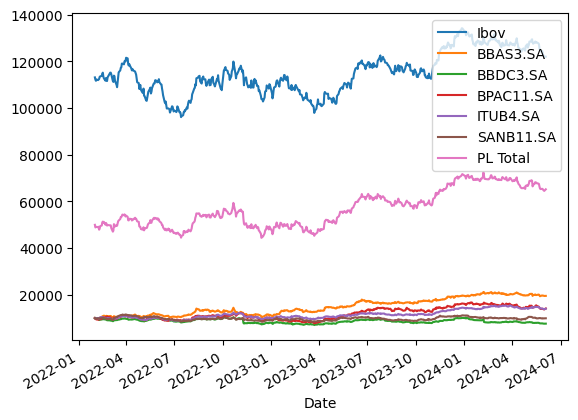

In [29]:
novo_df.plot()

In [30]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [31]:
novo_normalizado

,Ibov,BBAS3.SA,BBDC3.SA,BPAC11.SA,ITUB4.SA,SANB11.SA,PL Total
Date,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,98.344062,98.334937,96.453598,98.430767,97.225622,97.757964
2022-02-03,98.717597,99.018712,99.719128,95.175242,99.568455,97.682937,98.233228
2022-02-04,99.202807,98.834713,99.932138,94.309274,99.882271,98.292706,98.250527
2022-02-07,98.982739,97.700089,100.091823,93.443282,99.333057,99.054889,97.924901
...,...,...,...,...,...,...,...
2024-05-27,110.030315,197.159417,77.461048,139.990740,141.300390,98.473419,130.873750
2024-05-28,109.397509,196.512048,77.261578,140.034184,140.543576,99.578265,130.782559
2024-05-29,108.449186,196.512048,76.463695,138.687695,139.564185,98.758539,129.993930


<Axes: xlabel='Date'>

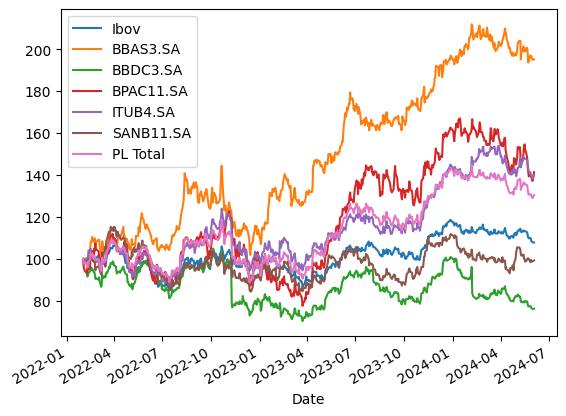

In [32]:
novo_normalizado.plot()

<Axes: >

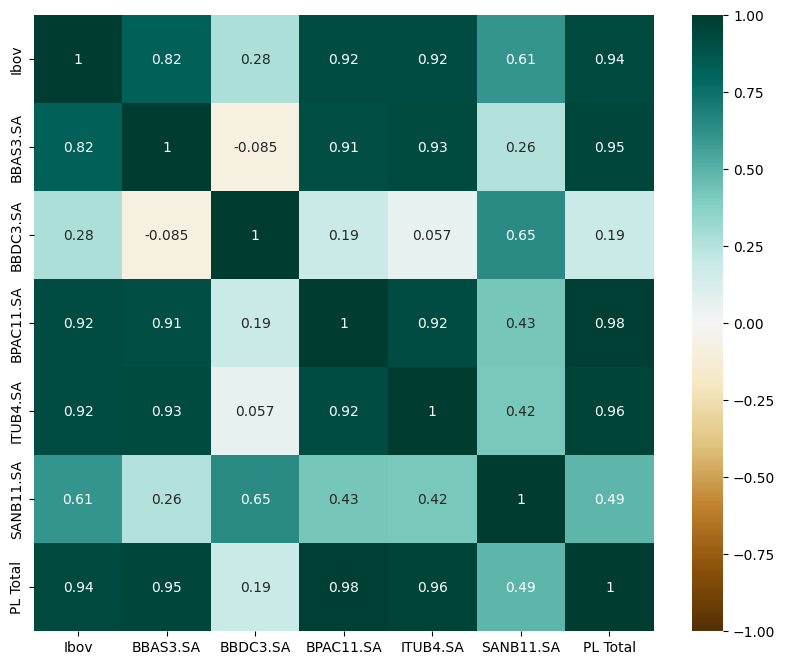

In [33]:
plt.figure(figsize = (10,8))

sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

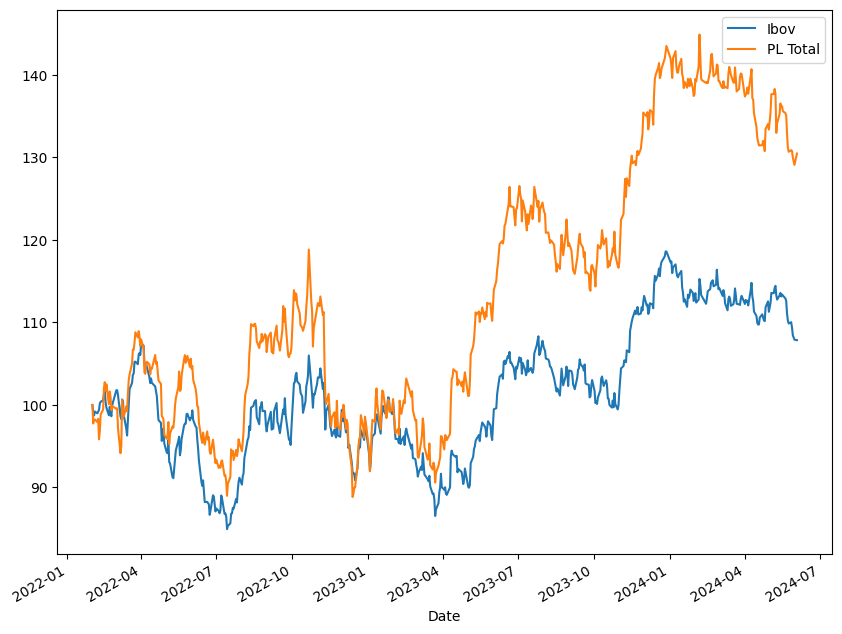

In [34]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (10,8))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [35]:
#retail ativos
ativos

['BBAS3.SA', 'BBDC3.SA', 'ITUB4.SA', 'BPAC11.SA', 'SANB11.SA']